Files already downloaded and verified
Files already downloaded and verified


RuntimeError: module must have its parameters and buffers on device cuda:0 (device_ids[0]) but found one of them on device: cpu

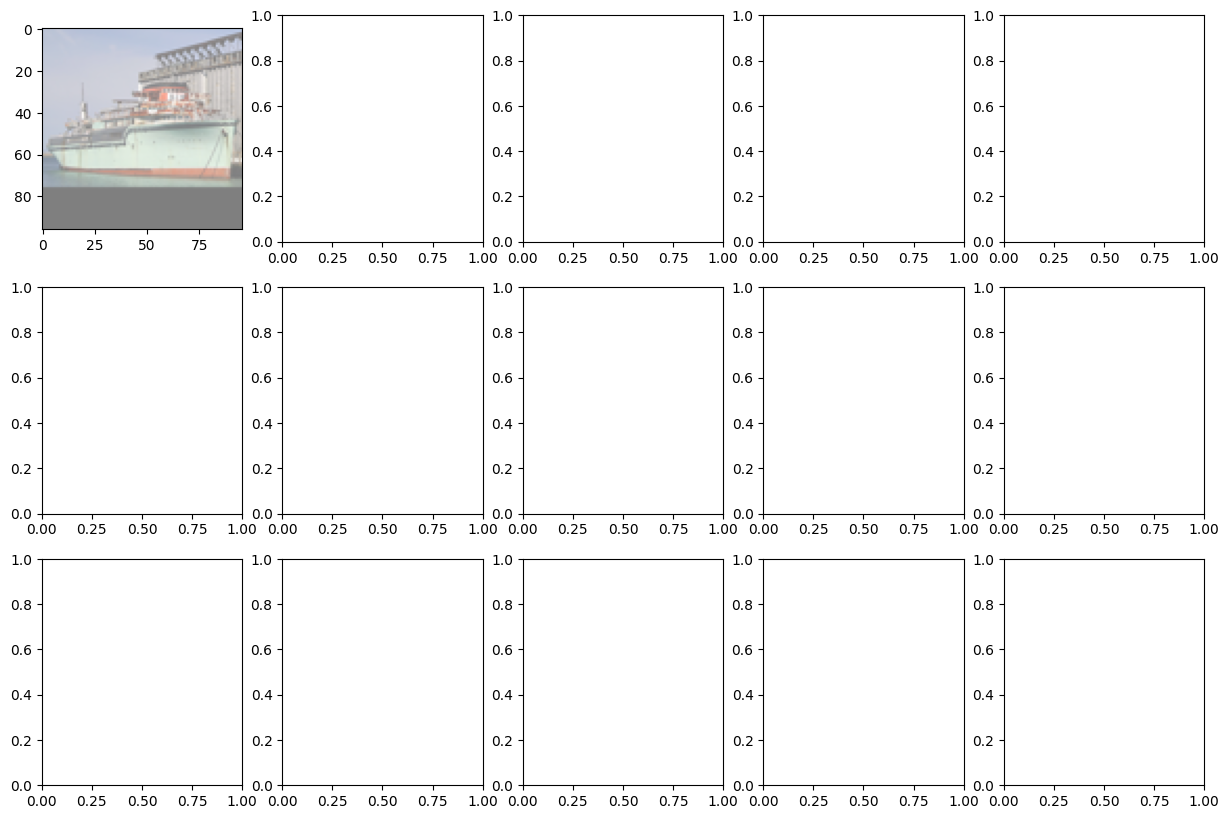

In [3]:
import os
import sys
import torch
import matplotlib.pyplot as plt
import numpy as np

from src.mobilenetv3 import mobilenetv3
from src.eval_classifier import validate
from src.boilerplate import get_dataset, get_model, resume_model, LRAdjust
from src.utils import Bar, Logger, AverageMeter, accuracy, mkdir_p, savefig

def img_display(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    npimg = np.transpose(npimg, (1, 2, 0))
    return npimg


device = torch.device("cpu")
train_loader, val_loader, train_loader_len, val_loader_len = get_dataset(1)
model = get_model(num_classes=10).to(device)

dataiter = iter(val_loader)
images, labels = next(dataiter)
arthopod_types = {0: 'Coleoptera', 1: 'Diptera', 2: 'Hymenoptera', 3: 'Lepidoptera'}
# Viewing data examples used for training
fig, axis = plt.subplots(3, 5, figsize=(15, 10))
with torch.no_grad():
    model.eval()
    for ax, image, label in zip(axis.flat,images, labels):
        ax.imshow(img_display(image)) # add image
        image_tensor = image.unsqueeze_(0).to(device)
        output_ = model(image_tensor.to(device))
        output_ = output_.argmax()
        k = output_.item()==label.item()
        ax.set_title(str(arthopod_types[label.item()])+":" +str(k)) # add label